# **PROJECT** : **CLASSIFICATION** 

## LIBRAIRIES

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

## I-) Pima

### Loading Data 

In [ ]:
pima = np.load("pima.npz")
list(pima)

['xall', 'yall', 'varnames']

In [ ]:
X1 = pima['xall']
y1 = pima["yall"]
names_pima = pima["varnames"]
X1 = pd.DataFrame(X1, columns=names_pima)
X1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7.0,159.0,64.0,0.0,0.0,27.4,0.294,40.0
1,0.0,180.0,66.0,39.0,0.0,42.0,1.893,25.0
2,1.0,146.0,56.0,0.0,0.0,29.7,0.564,29.0
3,2.0,71.0,70.0,27.0,0.0,28.0,0.586,22.0
4,7.0,103.0,66.0,32.0,0.0,39.1,0.344,31.0


In [ ]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709 entries, 0 to 708
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               709 non-null    float64
 1   Glucose                   709 non-null    float64
 2   BloodPressure             709 non-null    float64
 3   SkinThickness             709 non-null    float64
 4   Insulin                   709 non-null    float64
 5   BMI                       709 non-null    float64
 6   DiabetesPedigreeFunction  709 non-null    float64
 7   Age                       709 non-null    float64
dtypes: float64(8)
memory usage: 44.4 KB


In [ ]:
X1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000
mean,3.747532,121.607898,69.643159,20.765867,80.531735,32.453032,0.470961,33.021157
std,3.339502,30.490598,18.135582,15.899540,112.678399,6.950733,0.325256,11.669089
min,0.000000,44.000000,0.000000,0.000000,0.000000,18.200000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.500000,0.243000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.374000,29.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.600000,0.629000,40.000000
max,17.000000,199.000000,122.000000,99.000000,744.000000,67.100000,2.420000,81.000000


In [ ]:
np.unique(y1, return_counts=True)

(array([-1,  1], dtype=int16), array([467, 242], dtype=int64))

### Visualization

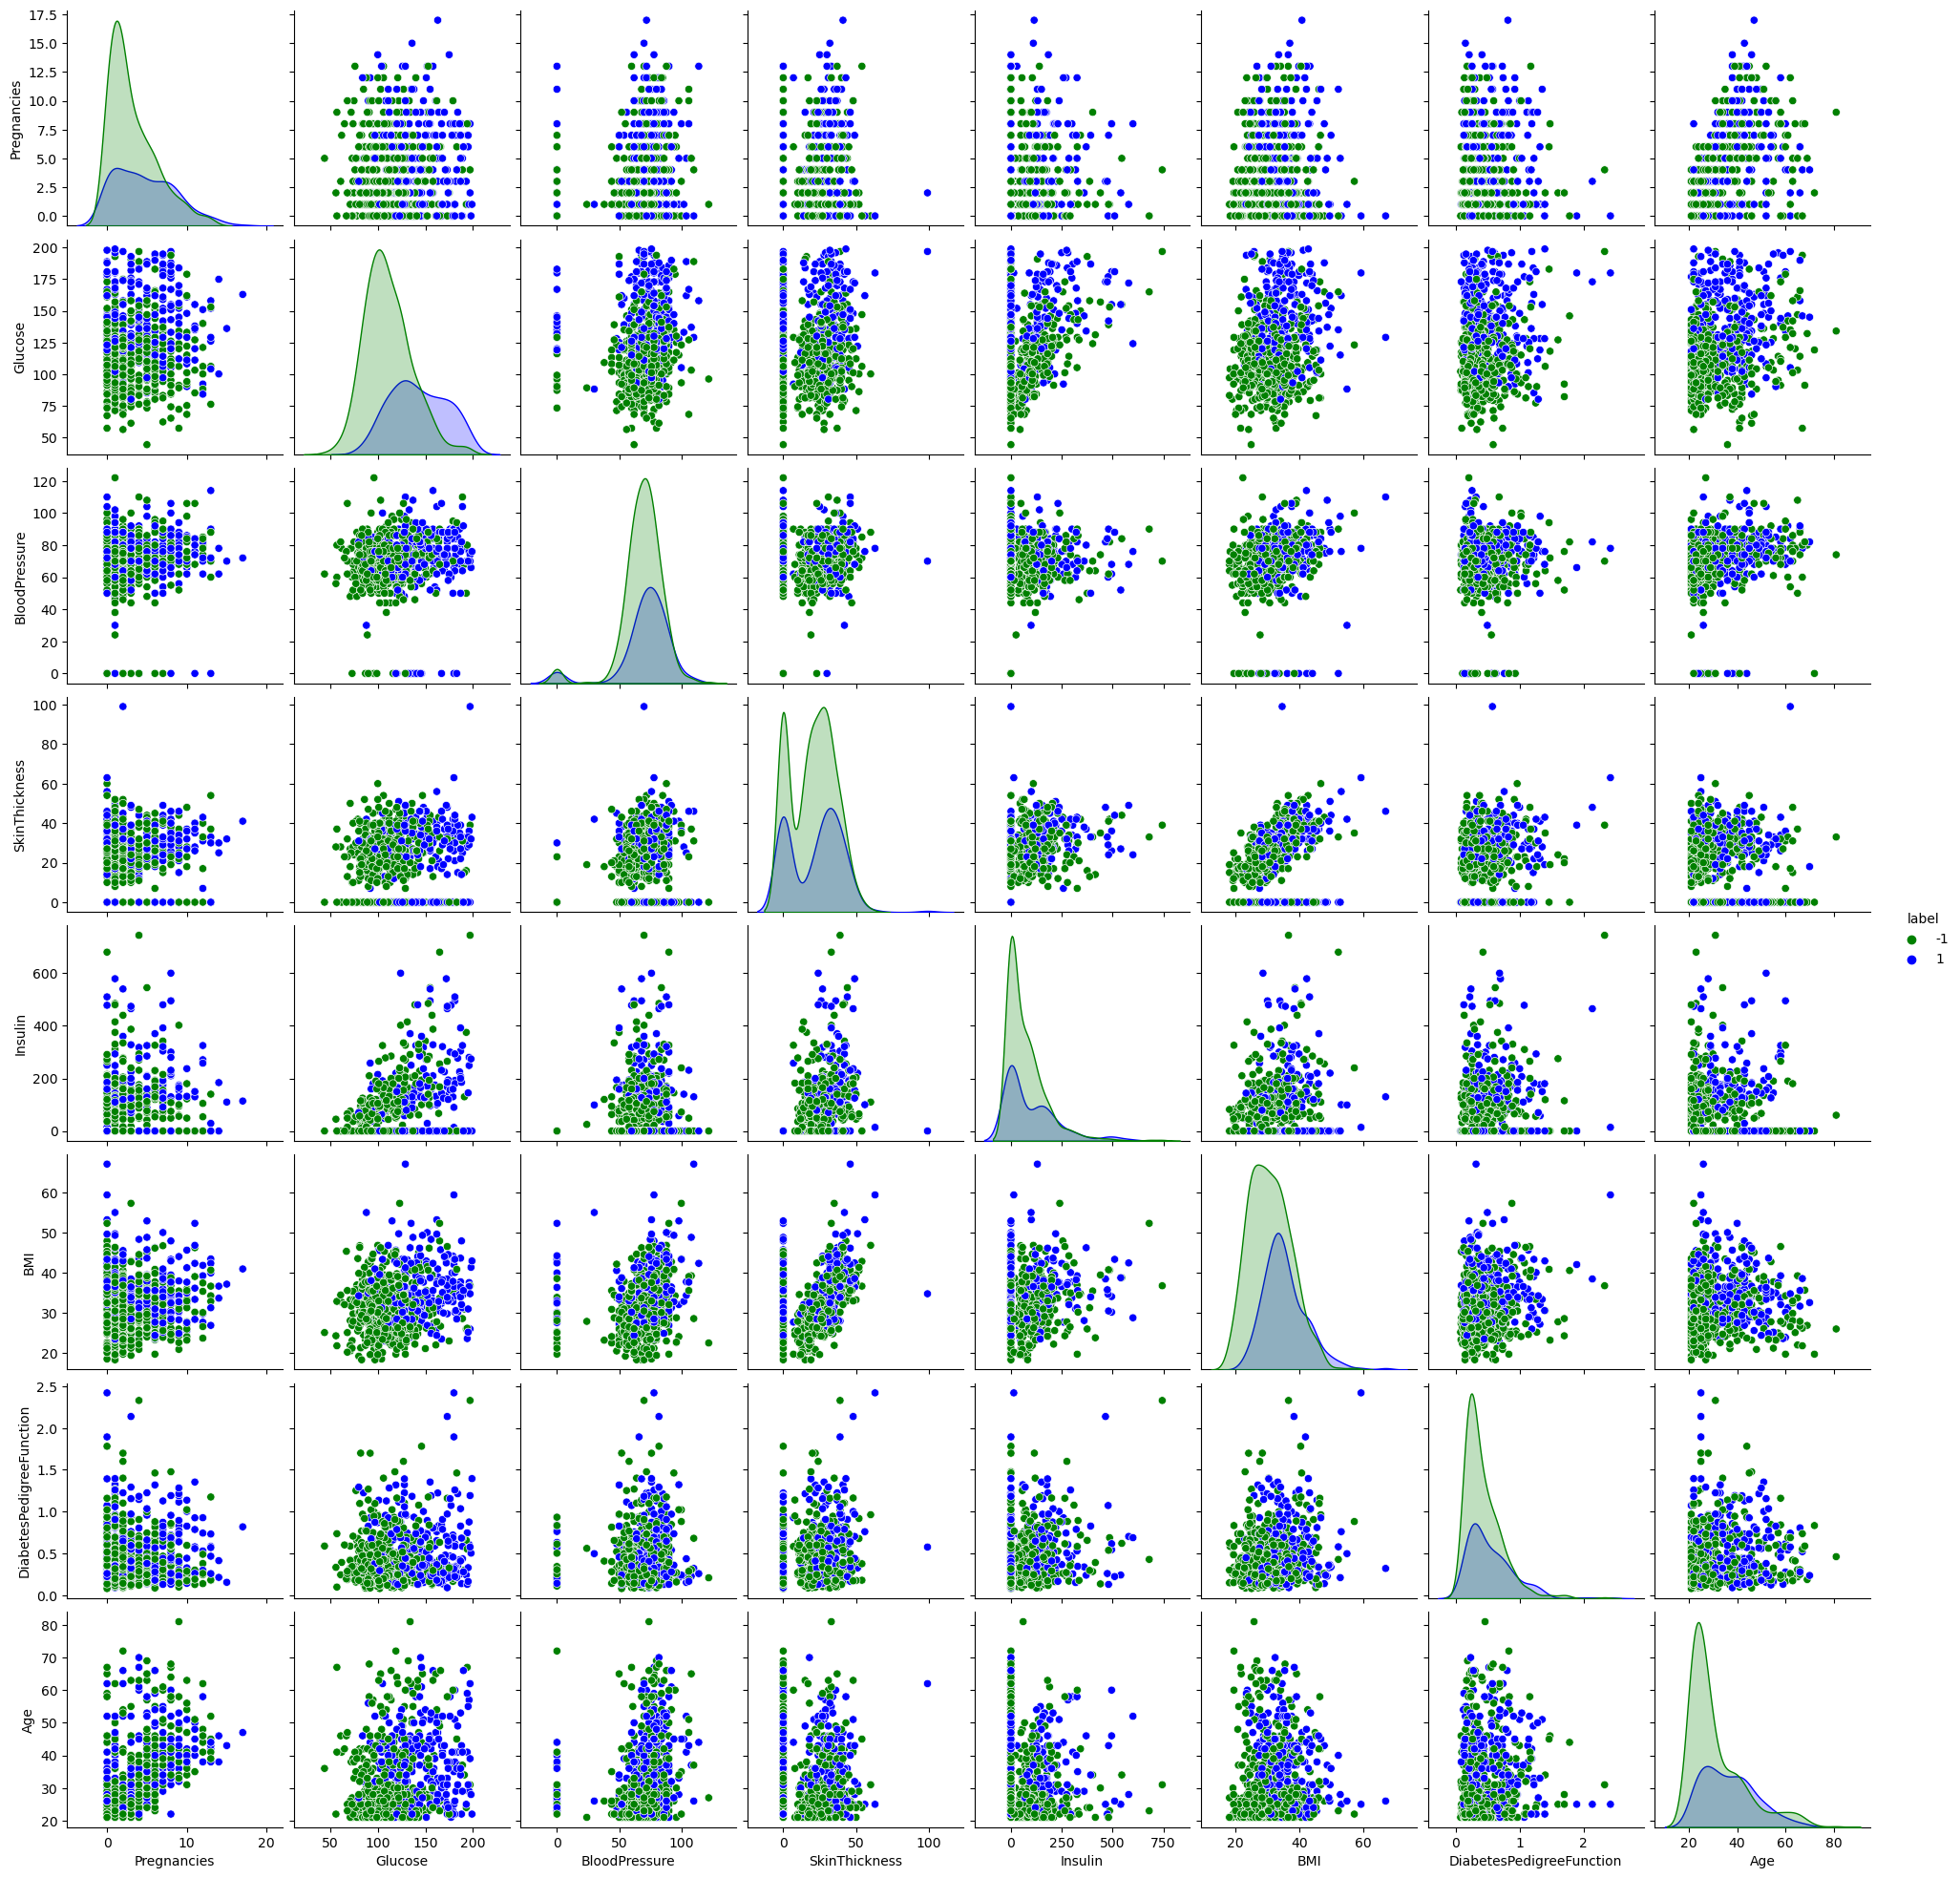

In [ ]:
## Pairplot of the data
X1_1 = X1.copy()
X1_1["label"] = y1
#sns.color_palette("tab10")
#plt.title("Scatter plot of the data")
sns.pairplot(X1_1, hue = "label", palette= {-1 : "green", 1 : "blue"})
plt.show()

BMI et Glucose are the variables that are the more discriminant in my personal opinion

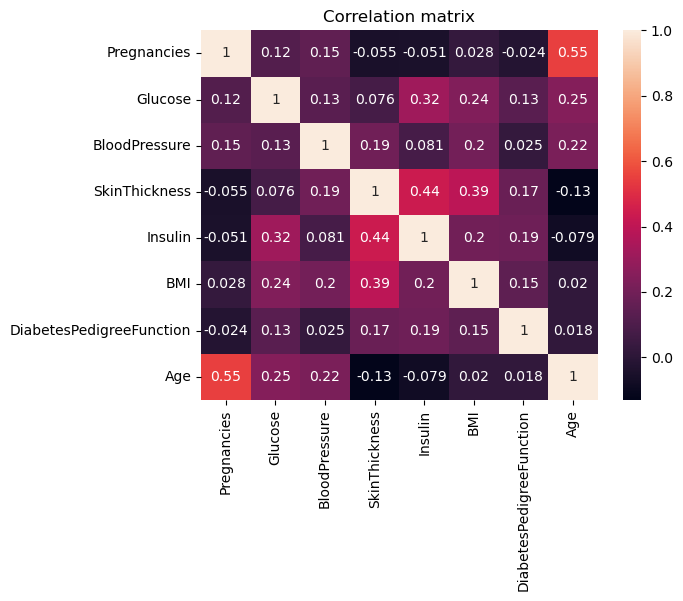

In [ ]:
### Here we will study the correlation
X1_cor = np.corrcoef(X1.T)
sns.heatmap(X1_cor, annot=True, xticklabels=names_pima, yticklabels=names_pima)
plt.title("Correlation matrix")
plt.show()

We observe that the features are independant with this information we can infer that an algorithm like the Naive Bayes Classifer could have good performance in this dataset

In [ ]:
# Splitting our data into train and test
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size=300, shuffle=True ,
                                                       random_state=42)

In [ ]:
# Checking the labal on train
np.unique(y1_train, return_counts=True)

(array([-1,  1], dtype=int16), array([188, 112], dtype=int64))

In [ ]:
# Checking the labal on test
np.unique(y1_test, return_counts=True)

(array([-1,  1], dtype=int16), array([279, 130], dtype=int64))

Here it's good to remark that we do not have an unbalanced dataset

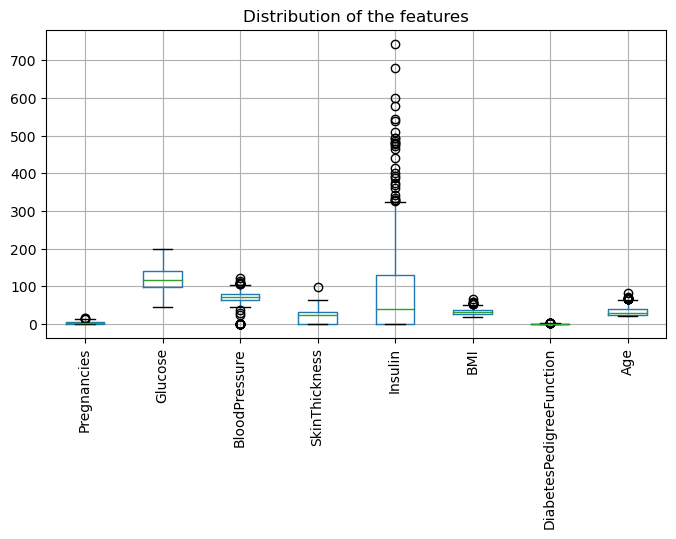

In [ ]:
# Visualization of the distribution of the features
plt.figure(figsize=(8,4))
X1.boxplot(rot = 90)
plt.title("Distribution of the features")
plt.show()

The features don't have similar scaling and that can affect some of the algorithm during the training that's the reason we will standardise our data

In [ ]:
# Standardization of the data
scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)

###  Bayesian decision and linear classification


#### 1-) LDA

In [ ]:
# Fitting LDA default parameters
clf = LinearDiscriminantAnalysis()
clf.fit(X1_train, y1_train)
y1_pred = clf.predict(X1_test)

print("The AUC on test is", roc_auc_score(y1_test, clf.predict_proba(X1_test)[:, 1]))
print("==========================================================")
print("CLASSIFICATION REPORT")
print(classification_report(y1_test, y1_pred))


The AUC on test is 0.8308519437551697
CLASSIFICATION REPORT
              precision    recall  f1-score   support

          -1       0.81      0.90      0.85       279
           1       0.72      0.55      0.62       130

    accuracy                           0.79       409
   macro avg       0.76      0.72      0.74       409
weighted avg       0.78      0.79      0.78       409



In [ ]:
# Cross validation & Grid search
parameters = {"solver" :('lsqr', 'eigen') , "shrinkage" : np.linspace(0,1,100)}
grid_search = GridSearchCV(
    LinearDiscriminantAnalysis(), parameters, scoring="roc_auc")
grid_search.fit(X1_train, y1_train)
print("Best parameter shrinkage : ")
print(grid_search.best_params_)

Best parameter shrinkage : 
{'shrinkage': 0.24242424242424243, 'solver': 'lsqr'}


In [ ]:
# Result
print("The cross validation score is : ", grid_search.best_score_)
print("The optimal AUC score on test is : ",grid_search.score(X1_test, y1_test))
print("==========================================================")
print("CLASSIFICATION REPORT")
print(classification_report(y1_test, grid_search.predict(X1_test)))

The cross validation score is :  0.8290277691879522
The optimal AUC score on test is :  0.8488006617038876
CLASSIFICATION REPORT
              precision    recall  f1-score   support

          -1       0.82      0.91      0.86       279
           1       0.74      0.57      0.64       130

    accuracy                           0.80       409
   macro avg       0.78      0.74      0.75       409
weighted avg       0.79      0.80      0.79       409



In [ ]:
# We will use this at the end for the comparison with other methods
result_lda = {
    "best_param" : grid_search.best_params_,
    "AUC_SCORE" : grid_search.score(X1_test, y1_test)
}

Finally Using Grid Search we gain a bit of performance on the AUC.

#### 2-) QDA

In [ ]:
# Fitting QDA default parameters
clf = QuadraticDiscriminantAnalysis()
clf.fit(X1_train, y1_train)
y1_pred = clf.predict(X1_test)

print("The AUC on test is : ", roc_auc_score(y1_test, clf.predict_proba(X1_test)[:, 1]))
print("==========================================================")
print("CLASSIFICATION REPORT")
print(classification_report(y1_test, y1_pred))


The AUC on test is :  0.8141714915908465
CLASSIFICATION REPORT
              precision    recall  f1-score   support

          -1       0.80      0.87      0.84       279
           1       0.66      0.55      0.60       130

    accuracy                           0.77       409
   macro avg       0.73      0.71      0.72       409
weighted avg       0.76      0.77      0.76       409



In [ ]:
# Cross validation & Grid search
parameters = {"reg_param" : [0.00001, 0.0001, 0.001,0.5, 0.1, 1]}
grid_search = GridSearchCV(
    QuadraticDiscriminantAnalysis(), parameters, scoring="roc_auc")
grid_search.fit(X1_train, y1_train)
print("Best parameter QDA : ")
grid_search.best_params_

Best parameter QDA : 


{'reg_param': 0.5}

In [ ]:
# Result
print("The cross validation score is : ", grid_search.best_score_)
print("The optimal AUC score on test is : ",grid_search.score(X1_test, y1_test))
print("==========================================================")
print("CLASSIFICATION REPORT")
print(classification_report(y1_test, grid_search.predict(X1_test)))

The cross validation score is :  0.8129580173058434
The optimal AUC score on test is :  0.8450785773366418
CLASSIFICATION REPORT
              precision    recall  f1-score   support

          -1       0.81      0.87      0.84       279
           1       0.67      0.55      0.61       130

    accuracy                           0.77       409
   macro avg       0.74      0.71      0.72       409
weighted avg       0.77      0.77      0.77       409



In [ ]:
# We will use this at the end for the comparison with other methods
result_qda = {
    "best_param" : grid_search.best_params_,
    "AUC_SCORE" : grid_search.score(X1_test, y1_test)
}

Here the gain of performance is more significant

#### 3-)  Gaussian Naive Bayes

In [ ]:
# Fitting GNB default parameters
clf_gnb = GaussianNB()
clf_gnb.fit(X1_train, y1_train)
y1_pred = clf_gnb.predict(X1_test)
result_gnb = roc_auc_score(y1_test, clf_gnb.predict_proba(X1_test)[:, 1])

print("The AUC on test is : ", result_gnb)
print("==========================================================")
print("CLASSIFICATION REPORT")
print(classification_report(y1_test, y1_pred))


The AUC on test is :  0.8415494899365867
CLASSIFICATION REPORT
              precision    recall  f1-score   support

          -1       0.84      0.88      0.86       279
           1       0.72      0.64      0.67       130

    accuracy                           0.80       409
   macro avg       0.78      0.76      0.77       409
weighted avg       0.80      0.80      0.80       409



as expected GNB work quite well

#### 4-)  Logistic Regression

In [ ]:
# Fitting LDA default parameters
clf = LogisticRegression()
clf.fit(X1_train, y1_train)
y1_pred = clf.predict(X1_test)
result_logic = roc_auc_score(y1_test, clf.predict_proba(X1_test)[:, 1])

print("The AUC on test is", result_logic )
print("==========================================================")
print("CLASSIFICATION REPORT")
print(classification_report(y1_test, y1_pred))


The AUC on test is 0.8316790736145575
CLASSIFICATION REPORT
              precision    recall  f1-score   support

          -1       0.81      0.88      0.84       279
           1       0.68      0.55      0.61       130

    accuracy                           0.78       409
   macro avg       0.74      0.71      0.72       409
weighted avg       0.77      0.78      0.77       409



In [ ]:
# Cross validation & Grid search
parameters = {"C" : np.arange(0.01, 1.5, 0.001),
             "solver" : ["liblinear", "saga"]}
grid_search = GridSearchCV(
    LogisticRegression(penalty="l1"), parameters, scoring="roc_auc", n_jobs=-1)
grid_search.fit(X1_train, y1_train)
print("Best parameter LogisticRegression : ")
grid_search.best_params_

Best parameter LogisticRegression : 


{'C': 0.33299999999999974, 'solver': 'saga'}

In [ ]:
# Result
print("The cross validation score is : ", grid_search.best_score_)
print("The optimal AUC score on test is : ",grid_search.score(X1_test, y1_test))
print("==========================================================")
print("CLASSIFICATION REPORT")
print(classification_report(y1_test, grid_search.predict(X1_test)))

The cross validation score is :  0.8309205606688443
The optimal AUC score on test is :  0.8390405293631101
CLASSIFICATION REPORT
              precision    recall  f1-score   support

          -1       0.82      0.91      0.86       279
           1       0.74      0.56      0.64       130

    accuracy                           0.80       409
   macro avg       0.78      0.73      0.75       409
weighted avg       0.79      0.80      0.79       409



In [ ]:
# Saving the best model and getting the parameters (we will use in the part of changing the threshold)
model_logistic = grid_search.best_estimator_
#print(model)
model_logistic.fit(X1_train, y1_train)


LogisticRegression(C=0.33299999999999974, penalty='l1', solver='saga')

In [ ]:
# Coefficient of the logistic with L1 regularization
model_logistic.coef_

array([[ 0.41358299,  1.2261741 , -0.26448944,  0.        ,  0.        ,
         0.35555555,  0.2288626 , -0.04592574]])

In [ ]:
# We will use this at the end for the comparison with other methods
result_logic = {
    "best_param" : grid_search.best_params_,
    "AUC_SCORE" : grid_search.score(X1_test, y1_test)
}

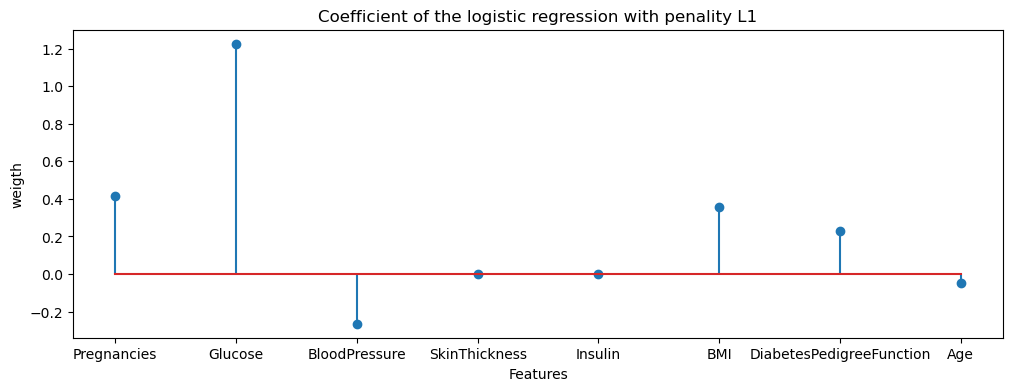

In [ ]:
# Visualization of the coefficients
plt.figure(figsize=(12,4))
plt.stem(model_logistic.coef_.flatten())
plt.title("Coefficient of the logistic regression with penality L1")
plt.xticks(ticks=np.arange(len(names_pima.tolist())), labels=names_pima)
plt.xlabel("Features")
plt.ylabel("weigth")
plt.show()

- Due to the penality the model try to remove the features that are not really important by introducing a bit of sparsity for instance the features **SkinThickness** and **insulin** were remove and **age** don't really have much importance.
- We can also observe that like we saw in the scatter plot the model accorde an high importance to **Glucose** and **BMI** 
- We did not really observe that by the graphics but **Pregnancies** also had an high importance for the prediction. 

##### Choice of the method

In terms of AUC performance the best model is QDA but i have to put a bit of warning here because i think this result is according to the original splitting that I made. So if I change the random state during the train test split that i put originally to 42, the result are changing a little bit but not that much to be problematic.

Here the best model are the quadractic one but the differencence it's not really obvious all the algorithm reach a test score (AUC) about 83-85%

##### Histogram of the sample

I will use the GNB algorithm

In [ ]:
clf_gnb.predict_proba(X1_test)[y1_test==-1,1].shape

(409, 2)

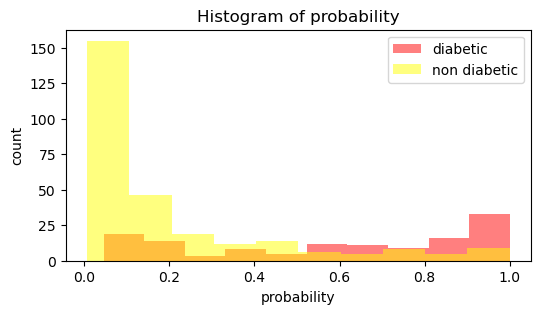

In [ ]:
# Visualization of the probality distribution
plt.figure(figsize=(6,3))
plt.hist(clf_gnb.predict_proba(X1_test)[y1_test==1,1],alpha=0.5,label="diabetic", color="red")
plt.hist(clf_gnb.predict_proba(X1_test)[y1_test==-1,1],alpha=0.5,label="non diabetic", color="yellow")
plt.xlabel("probability")
plt.ylabel("count")
plt.title("Histogram of probability")
plt.legend()
plt.show()

We observe that the algorithm is better at predicting the non diabetic class than the diabetic class

##### Interpreting the weigth of the logistic regression

We saw with logistic regression that the features **Glucose**, **BMI**, **Pregnancies** are the one that have the more importance for predicting the class :
- Their weigths are positives and this mean that the higher this featiure are the more probable the person will have diabetes, for **Glucose**, **BMI** it's pretty obvious and it does make sens even in a medical point of view
- About **Pregnancies** is less more obvious but with a bit of research I found that there is a type of diabetes call **gestational diabetes** who tend to occur when a woman previously had a baby who weighed 4.5kg (10lbs) or more at birth or you had gestational diabetes in a previous pregnancy.

###  Nonlinear methods


In [ ]:
# General function for the non linear method
def Nonlinear_regression(model, model_name, param_grid, search_type, k, n=None):
    # Fit and Prediction with default parameter
    clf = model
    clf.fit(X1_train, y1_train) 
    #  Default prediction performance
    score_default = roc_auc_score(y1_test, clf.predict_proba(X1_test)[:, 1])
    print("==========================================================================")
    print(f"Result of {model_name} with Default parameters : \n")   
    print("The AUC score on test is :", score_default)
    print("=========================================================================== \n")
    # Fiding best parameters and optimal performance with either a grid or random search
    if search_type == "Random":
        grid = RandomizedSearchCV(estimator=clf, param_distributions=param_grid,
                              cv=k, n_iter=n, n_jobs=-1,scoring="roc_auc",
                             random_state=42)
    elif search_type == "Grid" :
        grid = GridSearchCV(estimator=clf, param_grid=param_grid,
                              scoring="roc_auc", cv=k, n_jobs=-1)
    
    # Fitting the model with the optimal parameters find by the grid search
    grid.fit(X1_train, y1_train)
    y1_pred = grid.predict(X1_test)
    # Compute the prediction and the performance over the train and the test
    score_search = grid.score(X1_test, y1_test)
    print("=============================================================================")
    print(f"Result from {model_name} with a Searching CV: \n")
    print("The Cross validation score (AUC) for the best search model is :", 
          grid.best_score_, "\n")
    print("The best parameters across all searched params :", grid.best_params_, "\n")
    print("The AUC score on test is :", score_search)

    print("==============================================================================")
    
    # Classification reports 
    print("CLASSIFICATION REPORT : ")
    print(classification_report(y1_test, y1_pred))
    return score_default, score_search

#### 1-) RandomForestClassifier

In [ ]:
grid_RF = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']    
}

score_default_RF, score_search_RF = Nonlinear_regression(
    model=RandomForestClassifier(), model_name="RandomForestRegressor",
    param_grid=grid_RF, search_type ="Grid", k=5, n=35)

Result of RandomForestRegressor with Default parameters : 

The AUC score on test is : 0.8427763992280121

Result from RandomForestRegressor with a Searching CV: 

The Cross validation score (AUC) for the best search model is : 0.8139950747502235 

The best parameters across all searched params : {'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 500} 

The AUC score on test is : 0.8579818031430934
CLASSIFICATION REPORT : 
              precision    recall  f1-score   support

          -1       0.81      0.92      0.86       279
           1       0.75      0.53      0.62       130

    accuracy                           0.79       409
   macro avg       0.78      0.72      0.74       409
weighted avg       0.79      0.79      0.78       409



#### 2-) SVC

In [ ]:
grid_SVC = {'C': [0.1,1, 10, 100], 
              'gamma': [1,0.1,0.01,0.001],
              'kernel': ['rbf', 'poly']}

score_default_SVC, score_search_SVC = Nonlinear_regression(
    model=SVC(probability=True), model_name="SVC",
    param_grid=grid_SVC, search_type ="Grid", k=5)

Result of SVC with Default parameters : 

The AUC score on test is : 0.8333609043286463

Result from SVC with a Searching CV: 

The Cross validation score (AUC) for the best search model is : 0.8285746012290633 

The best parameters across all searched params : {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'} 

The AUC score on test is : 0.8490488006617039
CLASSIFICATION REPORT : 
              precision    recall  f1-score   support

          -1       0.80      0.92      0.86       279
           1       0.76      0.52      0.61       130

    accuracy                           0.79       409
   macro avg       0.78      0.72      0.74       409
weighted avg       0.79      0.79      0.78       409



#### 3-) MLPClassifier

In [ ]:
grid_MLP = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

score_default_MLP, score_search_MLP = Nonlinear_regression(
    model=MLPClassifier(max_iter=500), model_name="MLPClassifier",
    param_grid=grid_MLP, search_type ="Grid", k=5)

Result of MLPClassifier with Default parameters : 

The AUC score on test is : 0.8161841742486904

Result from MLPClassifier with a Searching CV: 

The Cross validation score (AUC) for the best search model is : 0.8334931040880698 

The best parameters across all searched params : {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'sgd'} 

The AUC score on test is : 0.8550317066446099
CLASSIFICATION REPORT : 
              precision    recall  f1-score   support

          -1       0.81      0.89      0.84       279
           1       0.69      0.54      0.61       130

    accuracy                           0.78       409
   macro avg       0.75      0.71      0.73       409
weighted avg       0.77      0.78      0.77       409



#### 4-)GradientBoostingClassifier

In [ ]:
grid_GBC = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

score_default_GBC, score_search_GBC = Nonlinear_regression(
    model=GradientBoostingClassifier(), model_name="GradientBoostingClassifier",
    param_grid=grid_GBC, search_type ="Grid", k=5)

Result of GradientBoostingClassifier with Default parameters : 

The AUC score on test is : 0.8378549765646539

Result from GradientBoostingClassifier with a Searching CV: 

The Cross validation score (AUC) for the best search model is : 0.809321007089886 

The best parameters across all searched params : {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500} 

The AUC score on test is : 0.8329059829059828
CLASSIFICATION REPORT : 
              precision    recall  f1-score   support

          -1       0.78      0.94      0.85       279
           1       0.76      0.45      0.56       130

    accuracy                           0.78       409
   macro avg       0.77      0.69      0.71       409
weighted avg       0.78      0.78      0.76       409



### Comparison and interpretation


In [ ]:
# Agrregating the results
all_method =["LDA", "QDA", "GNB", "LogisticRegression","RandomForestClassifier",
             "SVC","MLPClassifier","GradientBoostingClassifier"]

final_comp = pd.DataFrame(data=[result_lda['AUC_SCORE'], result_qda['AUC_SCORE'],
                                result_gnb, result_logic['AUC_SCORE'], score_search_RF,
                               score_search_SVC, score_search_MLP, score_search_GBC],
                         index=all_method, columns=["AUC SCORE"])
final_comp

,AUC SCORE
LDA,0.848801
QDA,0.845079
GNB,0.841549
LogisticRegression,0.839041
RandomForestClassifier,0.857982
SVC,0.849049
MLPClassifier,0.855032
GradientBoostingClassifier,0.832906


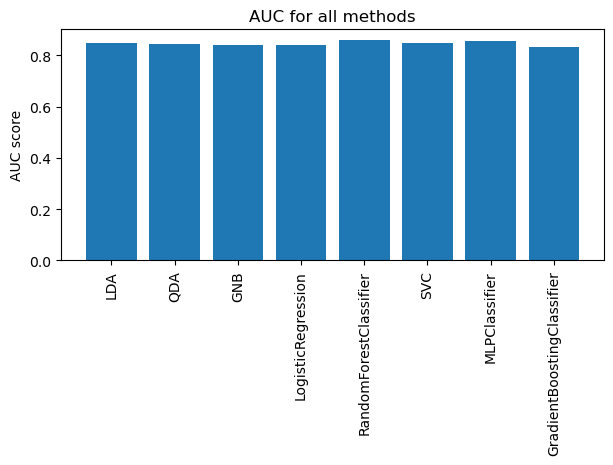

In [ ]:
# Visualizing the score for all methods
plt.figure(figsize=(7,3))
plt.bar(final_comp.index, final_comp.iloc[:,0])
plt.xticks(rotation = 90)
plt.title("AUC for all methods")
plt.ylabel("AUC score")
plt.show()

- The Method who achieve the best AUC SCORE is RandomForestClassifier
- The Model that will be more interesting for medical perspertive is the Logistic regression with penality L1 due to the fact the she is the most interprable and she got a good performance too
- In my personal opinion we dont need Non linearity here because even with the Linear one we achieved performance almost equal to the non linear one for instance LDA.

##### Confusion matrix for the test data 

Here i decide that my best model it's the one that achieve the best AUC (more details about this choice in the discussion at the end of the notebook), so i will choose the Randomforest classifier

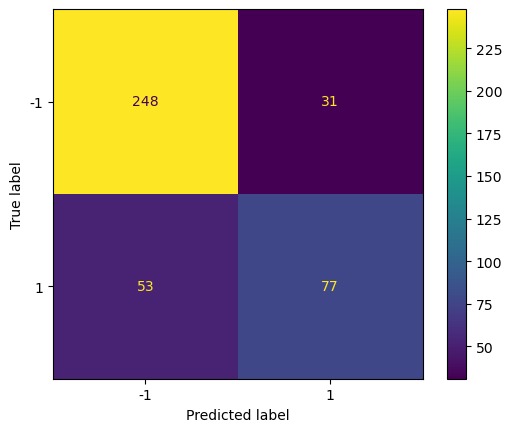

In [ ]:
# Confusin matrix RandomForest
best_model = RandomForestClassifier(criterion= 'entropy', max_depth = 7,
                                    max_features= 'log2', n_estimators= 500)
best_model.fit(X1_train, y1_train)

y_pred = best_model.predict(X1_test)


cm = confusion_matrix(y1_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["-1", "1"])
disp.plot()
plt.show()

In [ ]:
# Function to compute False negative rate
def FNR(a,b):
    fnr = a /(a + b) * 100 
    print(f"The False Negative rate is : {fnr : .3f} %")
print("FNR Randomforest : ")
FNR(52,78)

FNR Randomforest : 
The False Negative rate is :  40.000 %


#### Making the false negative rate under 10 %

Since the question in the tp want us to do that by changing the intercept I infer that we have to use the logistic regresion

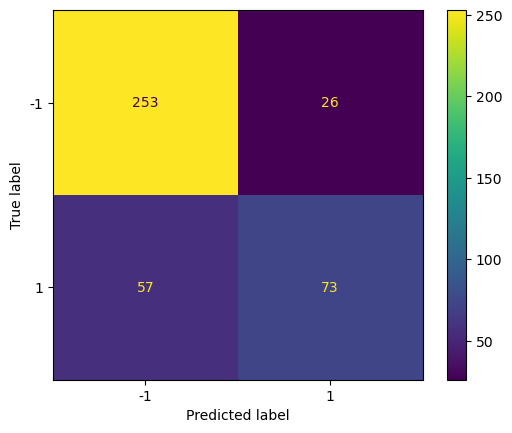

In [ ]:
# We will first look at the Confusion matrix for the logistic regression
# I store previously the model into "model_logistic"

y_pred = model_logistic.predict(X1_test)


cm = confusion_matrix(y1_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["-1", "1"])
disp.plot()
plt.show()

In [ ]:
print("FNR Logistic Regression without changing the intercept : ")
FNR(57,73)

FNR Logistic Regression without changing the intercept : 
The False Negative rate is :  43.846 %


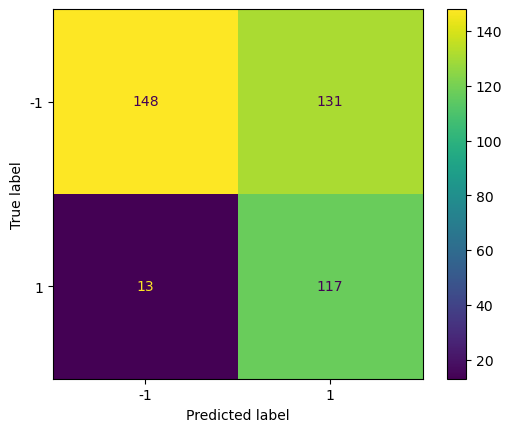

In [ ]:
# Changing the intercept of the logistic to reduce the False negative rate
model_logistic.intercept_=0.8

y_pred = model_logistic.predict(X1_test)


cm = confusion_matrix(y1_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["-1", "1"])
disp.plot()
plt.show()


In [ ]:
print("FNR Logistic Regression while changing the intercept : ")
FNR(13,117)

FNR Logistic Regression while changing the intercept : 
The False Negative rate is :  10.000 %


We finally reduced the FNR to less than 10%, but we can do even more, it's really interesting for medical purposes, because it's better to detect a diabetic early in order to find a way to cure them, whereas someone who is not sick, even if we predict they are sick, will not really be a problem compared to the other side

#### Using another method to decrease FNR

This was not ask but i want to show also that we can reduce the FNR using the RandomForest Classifier and for that i will use the Roc Curve

In [ ]:
from sklearn.metrics import  roc_curve

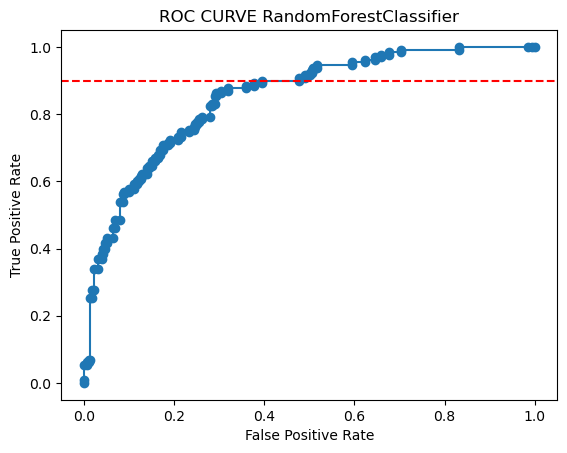

In [ ]:
# RandomForest ROC CURVE
probs_RF = best_model.predict_proba(X1_test)[:,1]
fpr, tpr, threshold = roc_curve(y1_test, probs_RF)

roc = {
    "fpr" : fpr,
    "tpr" : tpr,
    "threshold" : threshold
}

# Visualization
plt.figure()
plt.plot(fpr, tpr, "-o")
plt.axhline(0.9, color = "red", linestyle = "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC CURVE RandomForestClassifier")
plt.show()

We can basically take any threshold corresponding to the points above the line 

In [ ]:
# Data Frame of the element gerating by the roc curve
data_roc = pd.DataFrame(data=roc)
data_roc.sort_values("tpr", ascending=False)[25:35]

,fpr,tpr,threshold
100,0.491039,0.915385,0.196168
99,0.491039,0.907692,0.196549
98,0.476703,0.907692,0.203667
97,0.476703,0.900000,0.205536
96,0.394265,0.900000,0.235132
94,0.376344,0.892308,0.246015
95,0.394265,0.892308,0.235709
93,0.376344,0.884615,0.247698
92,0.358423,0.884615,0.263591
91,0.358423,0.876923,0.264965


It looks like 0.235132 is a good threshold


In [ ]:
# Final Model base on the ROC CURVE
def final_model_RF(prob , trh):
    decision = np.ones(prob.shape)
    decision[prob < trh] = -1
    return decision


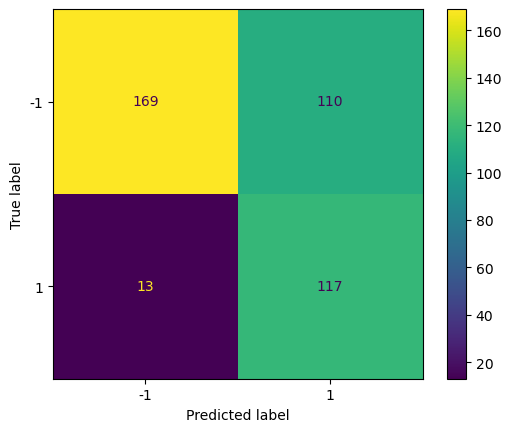

In [ ]:
# Confusion matrix tune model
y_pred = final_model_RF(prob=probs_RF, trh=0.235132)
cm = confusion_matrix(y1_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["-1", "1"])
disp.plot()
plt.show()

In [ ]:
print("FNR Final model RandomForest while changing the treshold : ")
FNR(13,117)

FNR Final model RandomForest while changing the treshold : 
The False Negative rate is :  10.000 %


We can also remark that this confusion matrix is a bit better than the previous one because we also detect 169 non diabetics person rather than 148 with the logistic regression.

## II-) Predicting Classes on the Digits dataset

### 1-) Loading & preprocessing

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Loading digits dataset
digits = np.load("digits.npz")

In [ ]:
print(digits.files)

['xt', 'yt', 'y', 'x']


In [ ]:
# Loading the images and the label
X = digits["x"]
y = digits["y"]
Xt = digits["xt"]
yt = digits["yt"]
print(X.shape)
print(y.shape)
print(Xt.shape)
print(yt.shape)

(3000, 784)
(3000, 1)
(1500, 784)
(1500, 1)


In [ ]:
# Normalize the input
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
Xt = scaler.transform(Xt)
y = y.flatten()
yt = yt.flatten()

#### 1- LinearDiscriminantAnalysis

In [ ]:
np.unique(yt, return_counts=True)

(array([1, 7, 8], dtype=uint8), array([500, 500, 500], dtype=int64))

In [ ]:
clf = LinearDiscriminantAnalysis()
clf.fit(X, y)
y_pred = clf.predict(Xt)
print("Accuracy on test : ", accuracy_score(yt, y_pred))
print("==========================================================")
print("CLASSIFICATION REPORT")
print(classification_report(yt, y_pred))


Accuracy on test :  0.9333333333333333
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           1       0.88      0.98      0.93       500
           7       0.97      0.91      0.94       500
           8       0.96      0.91      0.93       500

    accuracy                           0.93      1500
   macro avg       0.94      0.93      0.93      1500
weighted avg       0.94      0.93      0.93      1500



In [ ]:
parameters = {"solver" :('lsqr', 'eigen') , "shrinkage" : np.linspace(0,1,100)}
grid_search = GridSearchCV(
    LinearDiscriminantAnalysis(), parameters, scoring="accuracy", n_jobs=-1)
grid_search.fit(X, y)
grid_search.best_params_

{'shrinkage': 0.787878787878788, 'solver': 'lsqr'}

In [ ]:
# Score Tune
score_dig_lda = grid_search.score(Xt, yt)
print("Cross Validation LDA tune score :",  grid_search.best_score_)
print("Accuracy LDA tune on test : ", grid_search.score(Xt, yt))

Cross Validation LDA tune score : 0.9576666666666667
Accuracy LDA tune on test :  0.9406666666666667


#### 2-)  Logistic Regression

In [ ]:
clf = LogisticRegression(max_iter=500)
clf.fit(X, y)
y_pred = clf.predict(Xt)
print("Accuracy on test : ", accuracy_score(yt, y_pred))
print("==========================================================")
print("CLASSIFICATION REPORT")
print(classification_report(yt, y_pred))

Accuracy on test :  0.9653333333333334
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           1       0.95      0.99      0.97       500
           7       0.98      0.95      0.97       500
           8       0.97      0.96      0.96       500

    accuracy                           0.97      1500
   macro avg       0.97      0.97      0.97      1500
weighted avg       0.97      0.97      0.97      1500



In [ ]:
parameters = {"C" : [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
             "solver" : ["liblinear", "saga"]}
grid_search = GridSearchCV(
    LogisticRegression(penalty="l1", max_iter=10000), parameters, 
    scoring="accuracy", n_jobs=-1)
grid_search.fit(X, y)
grid_search.best_params_

{'C': 1, 'solver': 'saga'}

In [ ]:
# Score tune
score_dig_logit = grid_search.score(Xt, yt)
print("Cross Validation score :",  grid_search.best_score_)
print("Accuracy Logistic tune on test : ", grid_search.score(Xt, yt))

Cross Validation score : 0.9736666666666667
Accuracy Logistic tune on test :  0.9626666666666667


#### 3-) SVC

In [ ]:
clf = SVC()
clf.fit(X, y)
y_pred = clf.predict(Xt)
print("Accuracy on test : ", accuracy_score(yt, y_pred))
print("==========================================================")
print("CLASSIFICATION REPORT")
print(classification_report(yt, y_pred))


Accuracy on test :  0.978
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           1       0.98      0.99      0.98       500
           7       0.99      0.96      0.97       500
           8       0.97      0.99      0.98       500

    accuracy                           0.98      1500
   macro avg       0.98      0.98      0.98      1500
weighted avg       0.98      0.98      0.98      1500



In [ ]:
grid_SVC = {'C': [0.1,1, 10, 100], 
              'gamma': [1,0.1,0.01,0.001],
              'kernel': ['rbf', 'poly', 'sigmoid', "linear"]}

grid_search_SVC = GridSearchCV(SVC(), grid_SVC, scoring="accuracy", n_jobs=-1)
grid_search_SVC.fit(X, y)
grid_search_SVC.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [ ]:
# Score Tune
score_dig_SVC = grid_search_SVC.score(Xt, yt)
print("Cross Validation score :",  grid_search_SVC.best_score_)
print("Accuracy SVC tune on test : ", grid_search_SVC.score(Xt, yt))

Cross Validation score : 0.9903333333333334
Accuracy SVC tune on test :  0.982


In [ ]:
# We will use at the end as our best predictor
best_clf_dig = grid_search_SVC.best_estimator_
score_dig_SVC = grid_search_SVC.score(Xt, yt)

#### 4-) MLP

In [ ]:
clf = MLPClassifier()
clf.fit(X, y)
y_pred = clf.predict(Xt)
print("Accuracy on test : ", accuracy_score(yt, y_pred))
print("==========================================================")
print("CLASSIFICATION REPORT")
print(classification_report(yt, y_pred))


Accuracy on test :  0.9773333333333334
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           1       0.97      0.99      0.98       500
           7       0.98      0.97      0.98       500
           8       0.98      0.97      0.98       500

    accuracy                           0.98      1500
   macro avg       0.98      0.98      0.98      1500
weighted avg       0.98      0.98      0.98      1500



In [ ]:
grid_MLP = {
    'hidden_layer_sizes': [(100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
grid_search = GridSearchCV(MLPClassifier(), grid_MLP, scoring="accuracy", n_jobs=-1)
grid_search.fit(X, y)
grid_search.best_params_

{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'solver': 'adam'}

In [ ]:
score_dig_MLP = grid_search.score(Xt, yt)
print("Cross Validation score :", grid_search.best_score_)
print("Accuracy MLP tune on test : ",grid_search.score(Xt, yt))

Cross Validation score : 0.9853333333333334
Accuracy MLP tune on test :  0.9786666666666667


In [ ]:
# Agrregating the results
all_method =["LDA", "QDA", "GNB", "LogisticRegression","RandomForestClassifier",
             "SVC","MLPClassifier","GradientBoostingClassifier"]

final_comp = pd.DataFrame(data=[result_lda['AUC_SCORE'], result_qda['AUC_SCORE'],
                                result_gnb, result_logic['AUC_SCORE'], score_search_RF,
                               score_search_SVC, score_search_MLP, score_search_GBC],
                         index=all_method, columns=["AUC SCORE"])
final_comp

,AUC SCORE
LDA,0.848801
QDA,0.845079
GNB,0.841549
LogisticRegression,0.839041
RandomForestClassifier,0.857982
SVC,0.849049
MLPClassifier,0.855032
GradientBoostingClassifier,0.832906


In [ ]:
## Aggregatin the result
methods = ["LDA", "Logisctic", "SVC", "MLP"]

final_comp = pd.DataFrame(data=[score_dig_lda, score_dig_logit, score_dig_SVC ,
                               score_dig_MLP],
                         index=methods, columns=["ACCURACY SCORE"])
final_comp

,ACCURACY SCORE
LDA,0.940667
Logisctic,0.962667
SVC,0.982000
MLP,0.978667


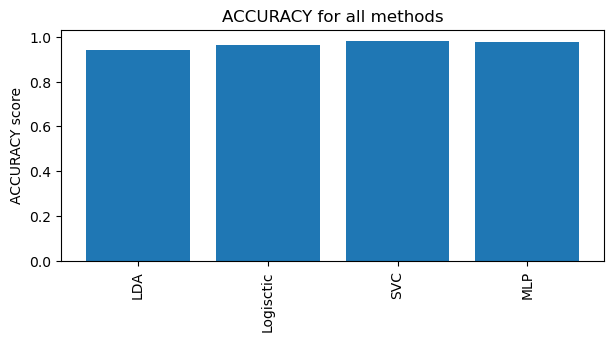

In [ ]:
# Visualizing the score for all methods
plt.figure(figsize=(7,3))
plt.bar(final_comp.index, final_comp.iloc[:,0])
plt.xticks(rotation = 90)
plt.title("ACCURACY for all methods")
plt.ylabel("ACCURACY score")
plt.show()

SVC is the best one

### Interpreting the classifier

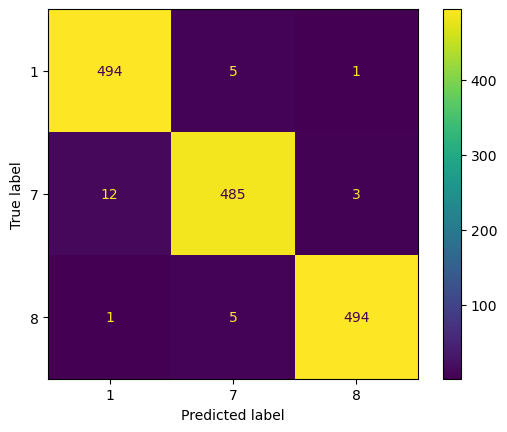

In [ ]:
# Confusion matrix digits classification with tune SVM
y_pred = best_clf_dig.predict(Xt)


cm = confusion_matrix(yt, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["1", "7", "8"])
disp.plot()
plt.show()

In [ ]:
# Classifation report SVM
print("Classification report SVC : ")
print(classification_report(yt, y_pred))

Classification report SVC : 
              precision    recall  f1-score   support

           1       0.97      0.99      0.98       500
           7       0.98      0.97      0.97       500
           8       0.99      0.99      0.99       500

    accuracy                           0.98      1500
   macro avg       0.98      0.98      0.98      1500
weighted avg       0.98      0.98      0.98      1500



We can interpret that for our best classifier who is SVC the class that is the most difficult to predict is the classe 7

The total number of misclassified digits in test is : 27


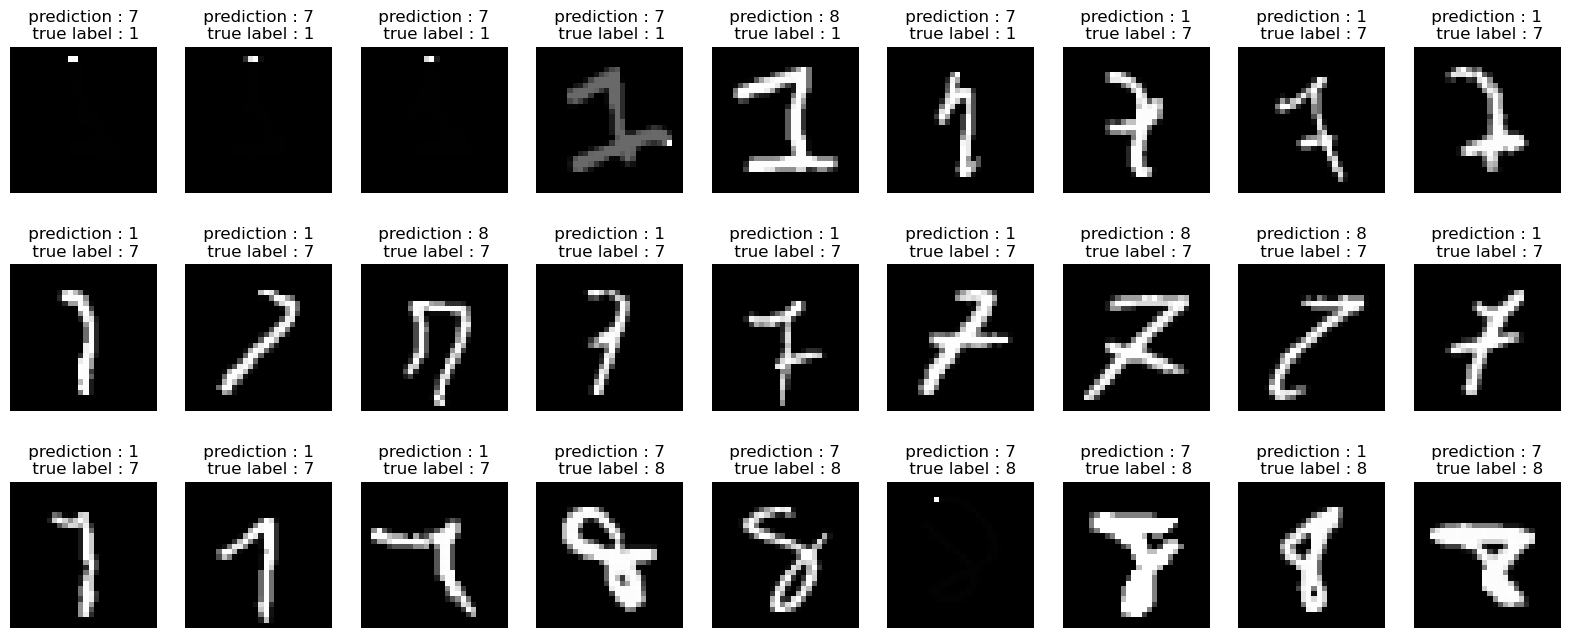

In [ ]:
### Misclassified digits
Xt_reshape = Xt.reshape(Xt.shape[0], 28, 28)
label_id = np.arange(yt.shape[0])
wrong_clf = label_id[yt != y_pred]
print("The total number of misclassified digits in test is :", wrong_clf.shape[0])

## Visualization
plt.figure(figsize=(20,8))
for i,j in enumerate(wrong_clf):
    plt.subplot(3,9, i+1)
    plt.imshow(Xt_reshape[j], cmap="gray")
    plt.title(f" prediction : {y_pred[j]} \n true label : {yt[j]}")
    plt.axis("off")
plt.show()    

Now by plotting the misclassified digits we realise that most of the misclassified digits are outliers but some 7 and 8 (in majority the 7) was misclassified even though they are recognizable.

## Adversarial examples

In [ ]:
## First we take a sample of 1000 well classified digit
# We first fix a seed for reproducible
np.random.seed(0)

# We select the id of samples that were good classifying and select randomly 1000 of them 
good_clf = label_id[yt == y_pred]
sample_id = np.random.choice(good_clf , 1000, replace = False)

# We select the images and the labels associated to this label
Xt_reshape = Xt_reshape[sample_id]
Xt_choice = Xt[sample_id]
yt_choice = yt[sample_id]

In [ ]:
# Function for generating noise
def g_noise(mu, sigma):
    return mu + sigma * np.random.randn(Xt_reshape.shape[0], 
                                        Xt_reshape.shape[1], Xt_reshape.shape[2])

# Generating noise and adding them to the images
noise = g_noise(0,0.25)
Xt_reshape_noisy = Xt_reshape + noise
values = np.random.choice(np.arange(0,Xt_reshape.shape[0] ), 45)

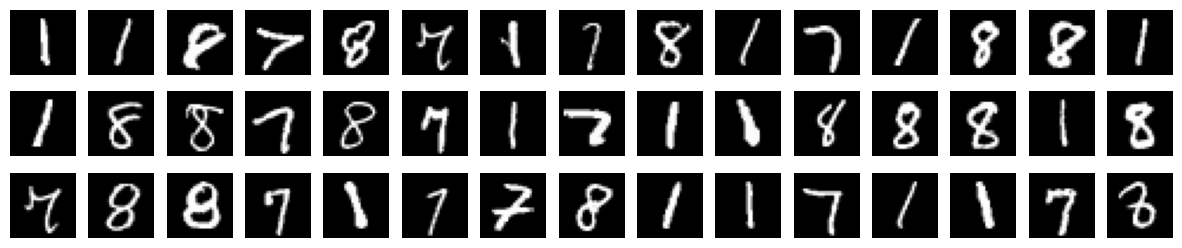

In [ ]:
# Visualization before adding noise 
plt.figure(figsize=(15,3))
for i,j in enumerate(values) :
    plt.subplot(3,15,i+1)
    plt.imshow(Xt_reshape[j], cmap="gray")
    plt.axis("off")
plt.show()

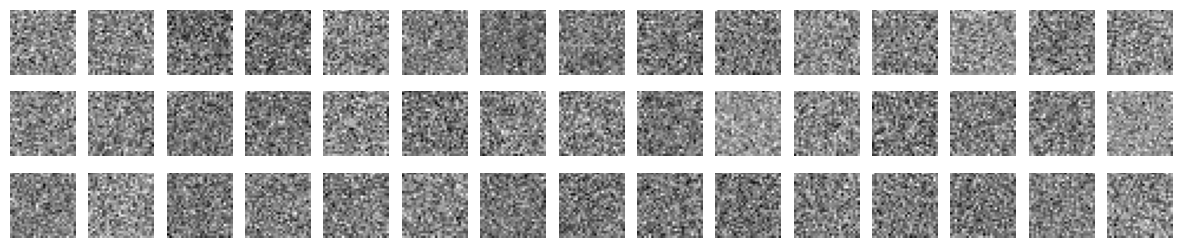

In [ ]:
# Visualization Noise
plt.figure(figsize=(15,3))
for i,j in enumerate(values) :
    plt.subplot(3,15,i+1)
    plt.imshow(noise[j], cmap="gray")
    plt.axis("off")
plt.show()

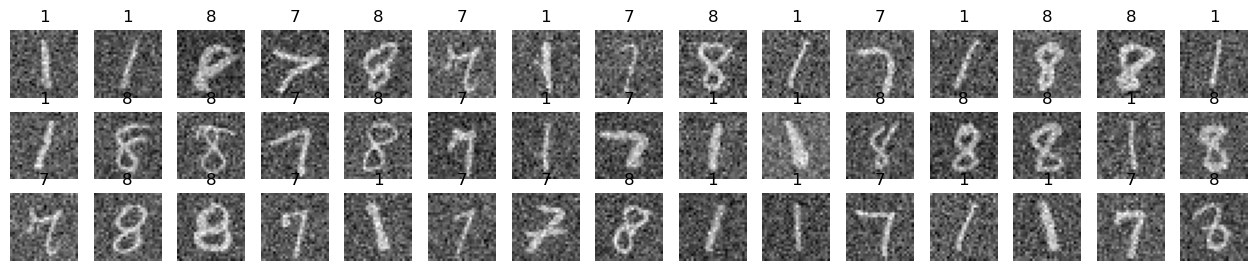

In [ ]:
# Visualization after adding noise 
plt.figure(figsize=(16,3))
for i,j in enumerate(values) :
    plt.subplot(3,15,i+1)
    plt.imshow(Xt_reshape_noisy[j], cmap="gray")
    plt.title(f"{yt_choice[j]}")
    plt.axis("off")
plt.show()

In [ ]:
# First we revify the accuracy on our sample without adding noise
y_pred_choice = best_clf_dig.predict(Xt_choice)

print("Accuracy on test sample without adding noise: ", accuracy_score(yt_choice, y_pred_choice))

Accuracy on test sample without adding noise:  1.0


In [ ]:
# Now we will fit our classifier to the noisy data and see the performance
Xt_noisy = Xt_reshape_noisy.reshape(Xt_reshape_noisy.shape[0], -1)
y_pred_noisy = best_clf_dig.predict(Xt_noisy)

print("Accuracy on test noisy: ", accuracy_score(yt_choice, y_pred_noisy))

Accuracy on test noisy:  0.992


The total number of misclassified digits (Adversarial examples) in test is : 8


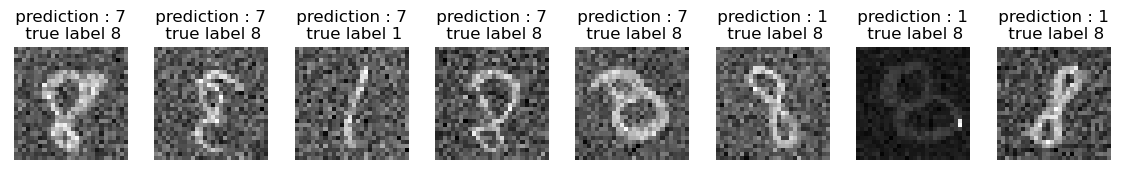

In [ ]:
## Visualization of some of those "adversarial" examples
label_id = np.arange(yt_choice.shape[0])
wrong_clf = label_id[yt_choice != y_pred_noisy]
print("The total number of misclassified digits (Adversarial examples) in test is :",
      wrong_clf.shape[0])

plt.figure(figsize=(16,5))
for i,j in enumerate(wrong_clf):
    plt.subplot(3,9, i+1)
    plt.imshow(Xt_reshape_noisy[j], cmap="gray")
    plt.title(f" prediction : {y_pred_noisy[j]} \n true label {yt_choice[j]}")
    plt.axis("off")
plt.show() 


I have to admit that the SVM classifier is really robust on this dataset, it's actually not that easy to find a good level of noise for which the digits still recognizable and at the same time decrease his accuracy  

## Discusion 

In this practical session we were able to appreciate the predictive capacities of the machine learning algorithms presented during the course through classification problems :

- For the prima dataset I chose as metric the AUC and by considering several classifiers I tried to find the one with the best AUC because with this criterion, we have more flexibility and more choice for the threshold in order to maximize other criteria such as the F1-score or the recall and this was essential given the medical context 

- for the digit dataset the idea here was clearly to find the classifier that gives us the best accuracy, and then to generate examples of adversaries for this classifier in order to test its robustness, I must admit that we had to add a fairly high level of noise in order to slightly decrease these performances without destroying the original images. 

Immersing myself in this project allowed me to have a better understanding of classification, for instance I learned it's sometimes better to be focus on the prediction probality for each class rather than the prediction of each class because the default threshold does not fit always our needs especially in case of false negative and false positive matters, I would have thought of using a non-supervised learning algorithm such as PCA puts the SVMs already a remarkable job on the digit data even as it was in large dimension, moreover for datasets such as Pima, feature engineering could also be added in a professional context for improving the performance.

One thing that i really learned during these labs is that linear model can have sometimes performances as good as the non linear and if for example there is not a big difference on score between linear and non linear I should focus on the linear because off his interpretability